In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


# File to Load
teen_pregnancies_to_load = Path("Resources/NCHS_-_U.S._and_State_Trends_on_Teen_Births.csv")
school_funding_path = Path("Resources/clean_funding_data.csv")

# Read School and Teen Pregnancie data file and store into Pandas DataFrames
teen_pregnancies_data = pd.read_csv(teen_pregnancies_to_load)
school_funding_data = pd.read_csv(school_funding_path)

# Get teen data for 2019 and change "Total U.S." to just United States
teen_pregnancies_data = teen_pregnancies_data[teen_pregnancies_data["Year"] > 2018]
teen_pregnancies_data.loc[[4568, 4620, 4672], "State"] = "United States"

# Clean school funding data 
# One row is completly empty lets get rid of it
# Rename some columns for readability and for merge purposes
school_funding_data.dropna(inplace=True)
school_funding_data = school_funding_data.rename(columns = {"Unnamed: 0":"State",
                                      "Total": "Total Revenue",
                                      "Total.1":"Total Expenditure",
                                      "Other2":"Other"})

# Quick note:
# All data left of "Total Expenditure" is revenue 
# All data right of "Total Expenditure" is expenditure

# Merge both data sets
full_data = pd.merge(school_funding_data, teen_pregnancies_data, on = ["State", "State"], how = "outer")
full_data

# There is a total of 52 unique "States" D.C. and the United States(Total) account for the extra two
# Each "State" has three rows to display pregnancie from 15-17, 15-19, 18-19 for a total of 156 rows

,State,Total Revenue,From federal sources,From state sources,From local sources,Total Expenditure,Current spending,Capital outlay,Other 2,Debt outstanding at end of fiscal year,Cash and securities,Year,Age Group (Years),State Rate,State Births,U.S. Births,U.S. Birth Rate,Unit
0,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,15-17 years,6.7,"41,081","41,081",6.7,"per 1,000"
1,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,15-19 years,16.7,"171,674","171,674",16.7,"per 1,000"
2,United States,751195882.0,57878962.0,350913041,342403879.0,752313761.0,652295832.0,76281609.0,23736320.0,494943150.0,270503906,2019,18-19 years,31.1,"130,593","130,593",31.1,"per 1,000"
3,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-17 years,10.1,925,"41,081",6.7,"per 1,000"
4,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-19 years,25.6,"3,955","171,674",16.7,"per 1,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Wisconsin,12393896.0,820330.0,6823763,4749803.0,12597517.0,10916575.0,1351644.0,329298.0,7715780.0,4835196,2019,15-19 years,12.5,"2,318","171,674",16.7,"per 1,000"
152,Wisconsin,12393896.0,820330.0,6823763,4749803.0,12597517.0,10916575.0,1351644.0,329298.0,7715780.0,4835196,2019,18-19 years,24.0,"1,835","130,593",31.1,"per 1,000"
153,Wyoming,1795211.0,132060.0,964553,698598.0,1716125.0,1532273.0,181815.0,2037.0,49650.0,772233,2019,15-17 years,6.6,70,"41,081",6.7,"per 1,000"
154,Wyoming,1795211.0,132060.0,964553,698598.0,1716125.0,1532273.0,181815.0,2037.0,49650.0,772233,2019,15-19 years,19.4,338,"171,674",16.7,"per 1,000"


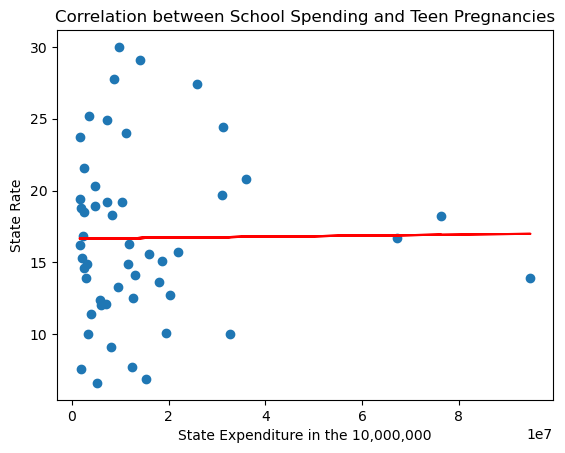

0.011706761782442808


,State,Expenditure,Birth Rate
4581,California,94791550.0,13.9
4609,New York,76365283.0,18.2
4620,Texas,67205724.0,16.7


In [2]:
#get rif of total us
pregnacies_full_age_gap = teen_pregnancies_data[teen_pregnancies_data["Age Group (Years)"] == "15-19 years"]
state_rate = pregnacies_full_age_gap["State Rate"]



expends = full_data["Total Expenditure"].unique()
expends
state_coer = pd.DataFrame(data = {"State": full_data["State"].unique(),
                                  "Expenditure": expends,
                                  "Birth Rate": state_rate})
                    

state_coer[state_coer["State"] == "United States"]
state_coer = state_coer.drop(4576)

#if you wish to drop the outliers
#state_coer = state_coer.drop(4620)
#state_coer = state_coer.drop(4609)
#state_coer = state_coer.drop(4581)

x_value = state_coer["Expenditure"]
y_values = state_coer["Birth Rate"] 

state_coer
plt.scatter(x_value, y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_values)
regress_values = x_value * slope + intercept
equation_string = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_value, regress_values, "r-")
plt.ylabel("State Rate")
plt.xlabel("State Expenditure in the 10,000,000")
plt.title("Correlation between School Spending and Teen Pregnancies")
plt.show()

print(rvalue)

state_coer["Expenditure"].sort_values()
state_coer[state_coer["Expenditure"] > 60000000]


<BarContainer object of 52 artists>

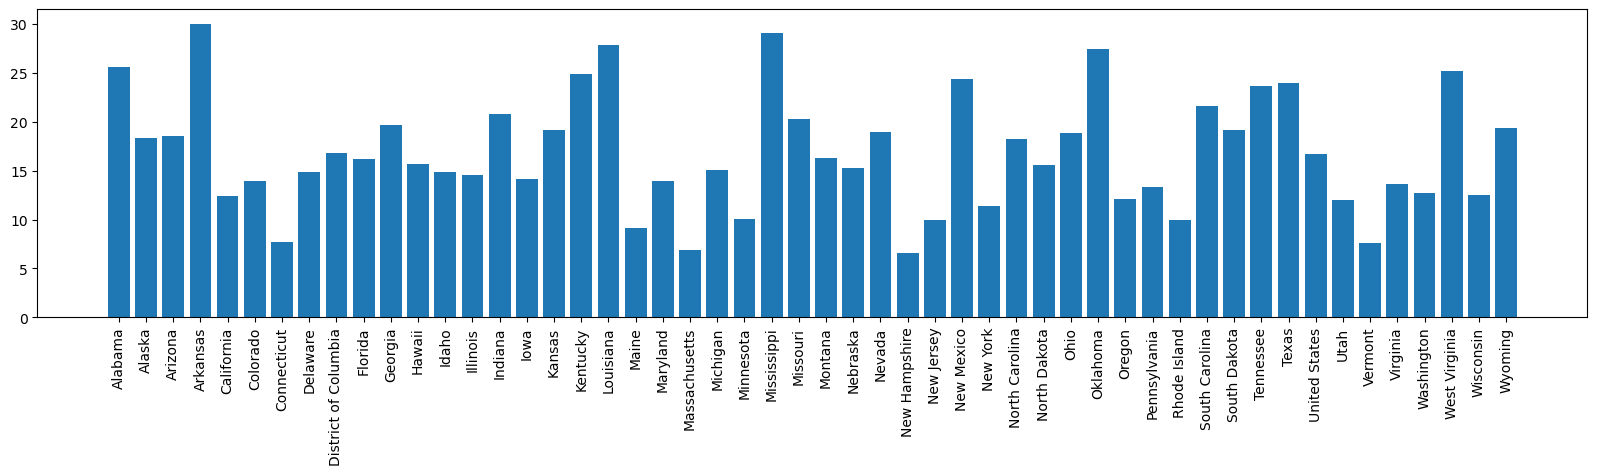

In [3]:
# Create the bar graph for 52 states wit regard to pregancy rates:
# Isolate Age Group (15-19), and birthrates(%):
birthrate = teen_pregnancies_data[teen_pregnancies_data["Age Group (Years)"] == "15-19 years"]["State Rate"]
state = teen_pregnancies_data["State"].unique()
# Plot the data:
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(state, birthrate)

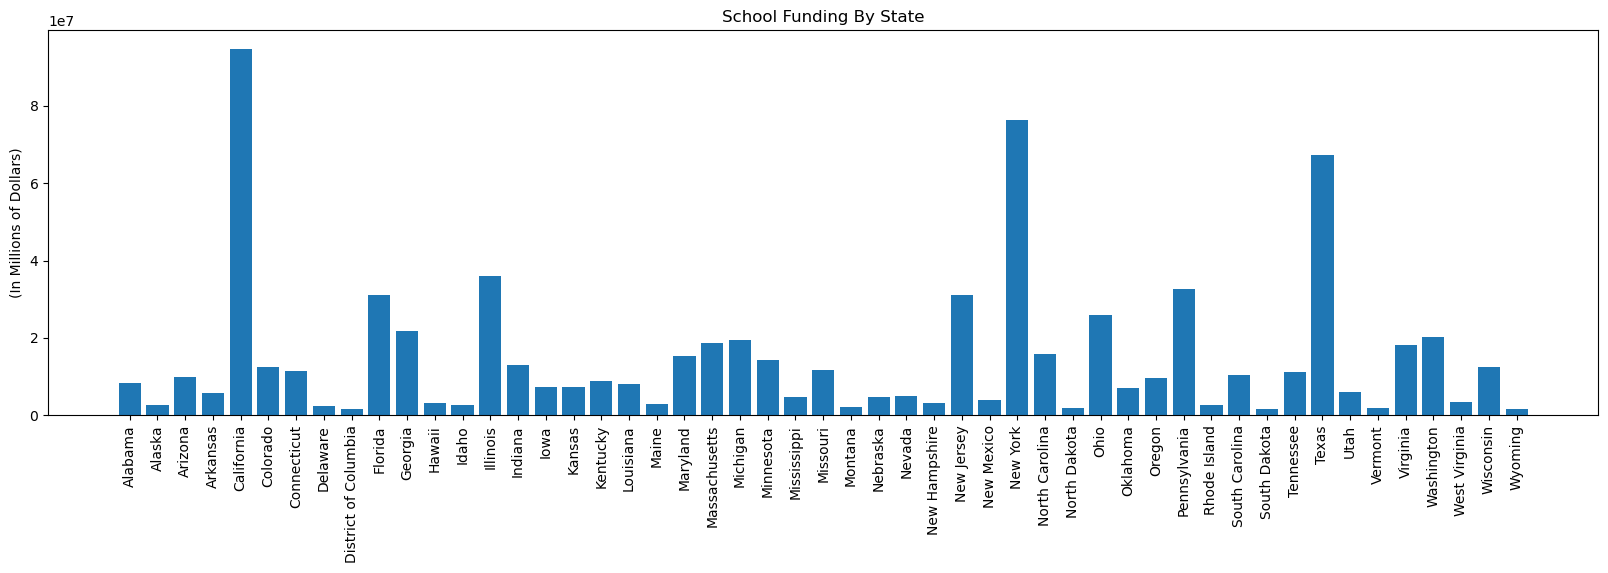

In [4]:
state_funding_data = school_funding_data.drop([0])


funding = state_funding_data["Total Expenditure"]
states = state_funding_data["State"].unique()
# Plot the data:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
#list_of_yticks = py.arange(0, 100, 20)
#plt.yticks(0, 100000000)
plt.bar(states, funding)
plt.title("School Funding By State")
plt.ylabel("(In Millions of Dollars)")
plt.show()

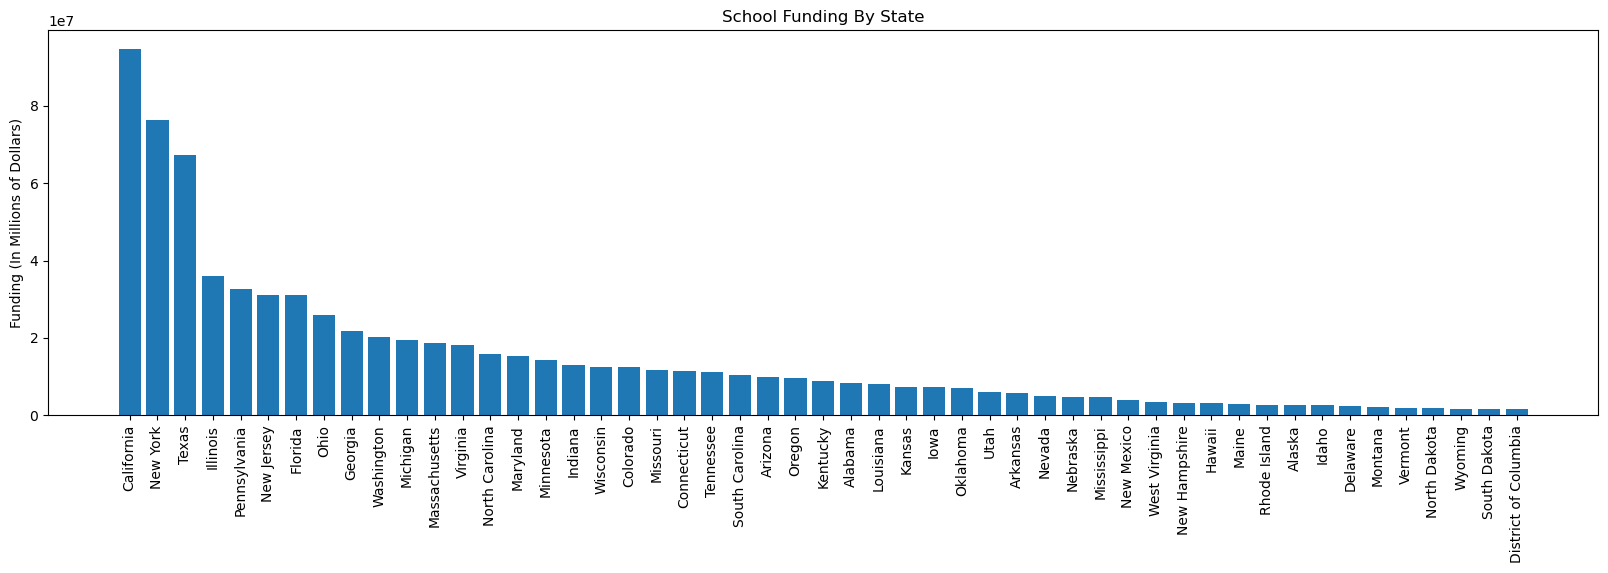

In [5]:
top_funding = state_funding_data.sort_values(by = "Total Expenditure", ascending = False)
top_funding.head()

most_funding = top_funding["Total Expenditure"]
most_states = top_funding["State"].unique()
# Plot the data:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
#list_of_yticks = py.arange(0, 100, 20)
#plt.yticks(0, 100000000)
plt.bar(most_states, most_funding)
plt.title("School Funding By State")
plt.ylabel("Funding (In Millions of Dollars)")
plt.show()

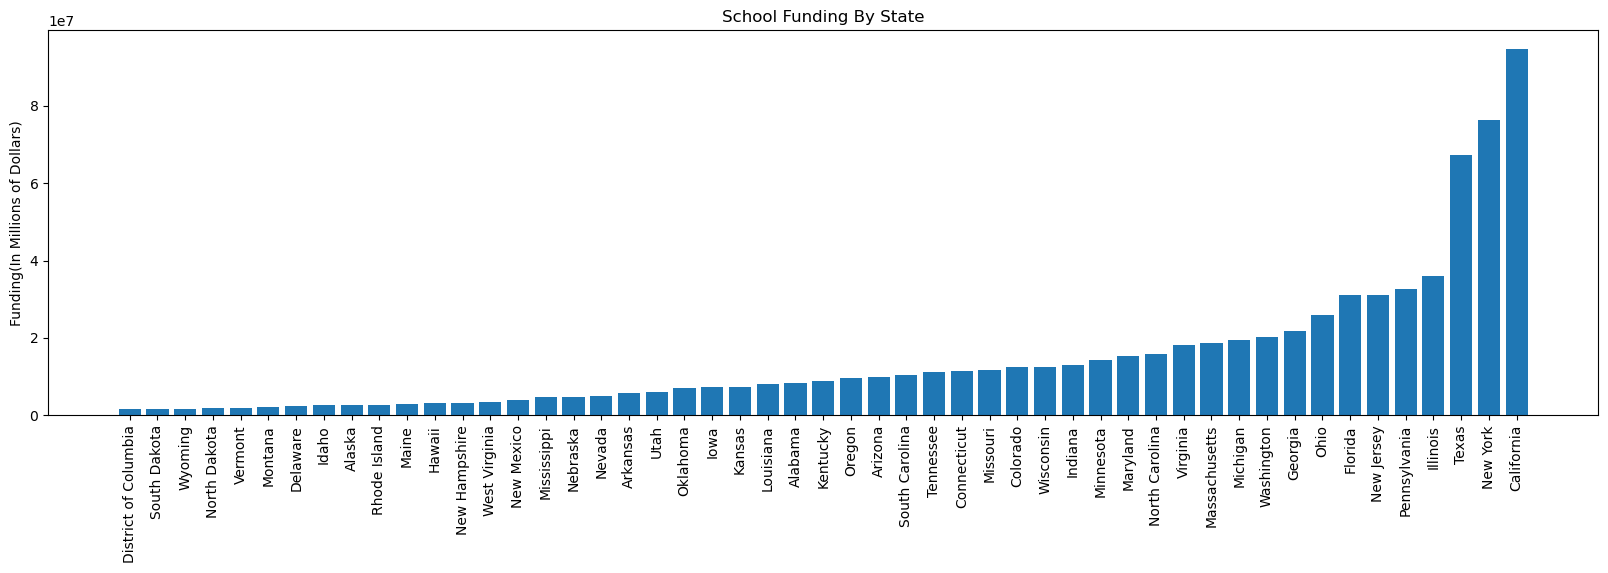

In [6]:
bottom_funding = state_funding_data.sort_values(by = "Total Expenditure", ascending = True)
bottom_funding.head()

least_funding = bottom_funding["Total Expenditure"]
least_states = bottom_funding["State"].unique()
# Plot the data:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
#list_of_yticks = py.arange(0, 100, 20)
#plt.yticks(0, 100000000)
plt.bar(least_states, least_funding)
plt.title("School Funding By State")
plt.ylabel("Funding(In Millions of Dollars)")
plt.show()

In [7]:
teen_pregnancies_data.head()

,Year,State,Age Group (Years),State Rate,State Births,U.S. Births,U.S. Birth Rate,Unit
4524,2019,Alabama,15-17 years,10.1,925,"41,081",6.7,"per 1,000"
4525,2019,Alaska,15-17 years,6.2,86,"41,081",6.7,"per 1,000"
4526,2019,Arizona,15-17 years,8.3,"1,135","41,081",6.7,"per 1,000"
4527,2019,Arkansas,15-17 years,11.2,645,"41,081",6.7,"per 1,000"
4528,2019,California,15-17 years,5.0,"3,691","41,081",6.7,"per 1,000"


In [8]:
#Sort the birthrates from most to least amount:
birthrate.sort_values(ascending = False)

4579    30.0
4600    29.1
4594    27.8
4612    27.4
4576    25.6
4625    25.2
4593    24.9
4607    24.4
4619    24.0
4618    23.7
4616    21.6
4590    20.8
4601    20.3
4586    19.7
4627    19.4
4617    19.2
4592    19.2
4604    18.9
4611    18.8
4578    18.5
4577    18.3
4609    18.2
4584    16.8
4620    16.7
4602    16.3
4585    16.2
4587    15.7
4610    15.6
4603    15.3
4598    15.1
4588    14.9
4583    14.9
4589    14.6
4591    14.1
4581    13.9
4596    13.9
4623    13.6
4614    13.3
4624    12.7
4626    12.5
4580    12.4
4613    12.1
4621    12.0
4608    11.4
4599    10.1
4615    10.0
4606    10.0
4595     9.1
4582     7.7
4622     7.6
4597     6.9
4605     6.6
Name: State Rate, dtype: float64

In [9]:
#Show top 5 rows after sorting:
birthrate.sort_values(ascending = False).head(5)

4579    30.0
4600    29.1
4594    27.8
4612    27.4
4576    25.6
Name: State Rate, dtype: float64

In [10]:
#Show lowest 5 rows after sorting:
birthrate.sort_values(ascending = True).head(5)

4605    6.6
4597    6.9
4622    7.6
4582    7.7
4595    9.1
Name: State Rate, dtype: float64

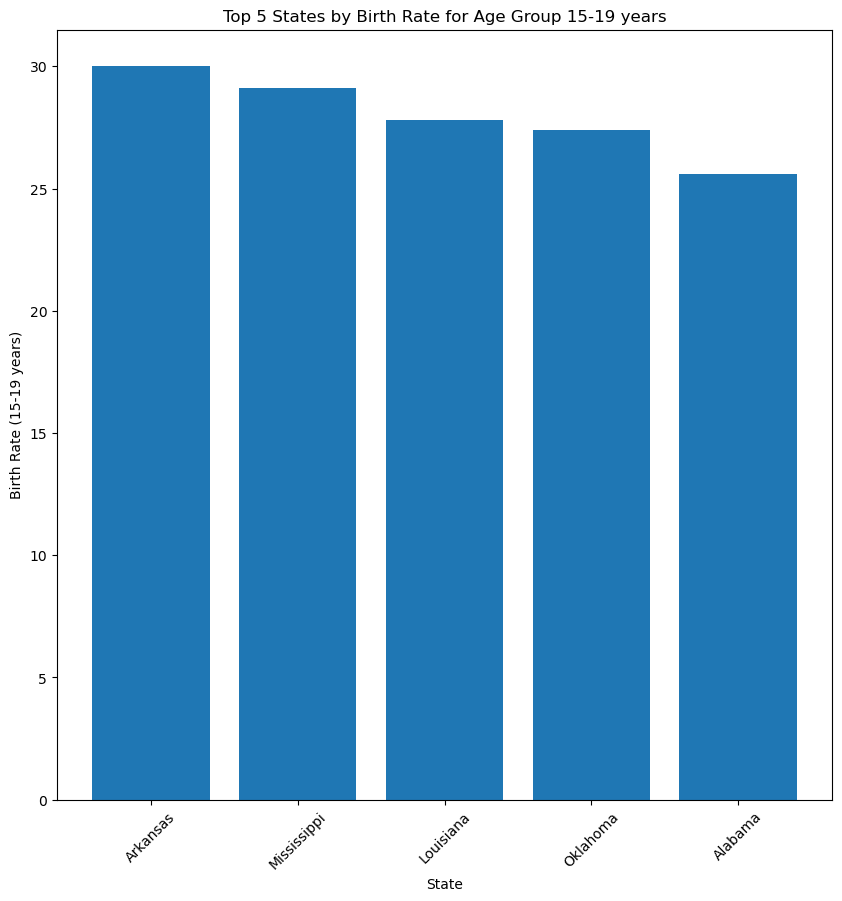

In [11]:
#CREATE A BAR GRAPH WITH THE TOP 5 STATES WITH TEEN PREGNANCIES (15-19):

# Assuming teen_pregnancies_data is a DataFrame with columns "Age Group (Years)", "State Rate", and "State"

# Filter rows where "Age Group (Years)" is "15-19 years"
filtered_data = teen_pregnancies_data[teen_pregnancies_data["Age Group (Years)"] == "15-19 years"]

# Sort these rows by "State Rate" in descending order and take the top 5
top_5_data = filtered_data.sort_values(by="State Rate", ascending=False).head(5)

# Extract the states and rates corresponding to these top 5 entries
top_5_states = top_5_data["State"]
top_5_rates = top_5_data["State Rate"]

# Create the bar plot
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.bar(top_5_states, top_5_rates)
plt.xlabel('State')
plt.ylabel('Birth Rate (15-19 years)')
plt.title('Top 5 States by Birth Rate for Age Group 15-19 years')
plt.show()

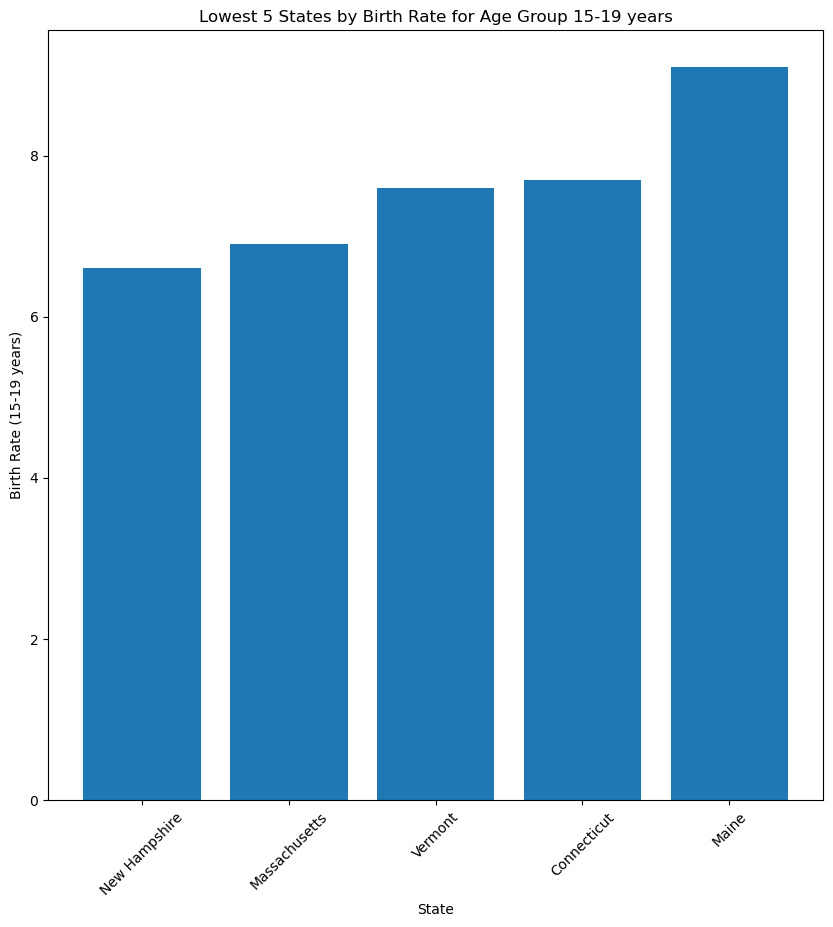

In [12]:
#CREATE A BAR GRAPH WITH THE LOWEST 5 STATES WITH TEEN PREGNANCIES (15-19):

# Assuming teen_pregnancies_data is a DataFrame with columns "Age Group (Years)", "State Rate", and "State"

# Filter rows where "Age Group (Years)" is "15-19 years"
filtered_data = teen_pregnancies_data[teen_pregnancies_data["Age Group (Years)"] == "15-19 years"]

# Sort these rows by "State Rate" in ascending order and take the top 5
low_5_data = filtered_data.sort_values(by="State Rate", ascending=True).head(5)

# Extract the states and rates corresponding to these top 5 entries
low_5_states = low_5_data["State"]
low_5_rates = low_5_data["State Rate"]

# Create the bar plot
plt.figure(figsize=(10, 10))
plt.xticks(rotation=45)
plt.bar(low_5_states, low_5_rates)
plt.xlabel('State')
plt.ylabel('Birth Rate (15-19 years)')
plt.title('Lowest 5 States by Birth Rate for Age Group 15-19 years')
plt.show()

In [13]:
full_data = full_data.drop(full_data.index[:3])
full_data.head(5)

,State,Total Revenue,From federal sources,From state sources,From local sources,Total Expenditure,Current spending,Capital outlay,Other 2,Debt outstanding at end of fiscal year,Cash and securities,Year,Age Group (Years),State Rate,State Births,U.S. Births,U.S. Birth Rate,Unit
3,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-17 years,10.1,925,"41,081",6.7,"per 1,000"
4,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,15-19 years,25.6,"3,955","171,674",16.7,"per 1,000"
5,Alabama,8412132.0,867947.0,4703782,2840403.0,8360002.0,7588368.0,593970.0,177664.0,4863725.0,2577325,2019,18-19 years,47.8,"3,030","130,593",31.1,"per 1,000"
6,Alaska,2557462.0,391955.0,1599899,565608.0,2580629.0,2416342.0,125159.0,39128.0,1125194.0,(X),2019,15-17 years,6.2,86,"41,081",6.7,"per 1,000"
7,Alaska,2557462.0,391955.0,1599899,565608.0,2580629.0,2416342.0,125159.0,39128.0,1125194.0,(X),2019,15-19 years,18.3,393,"171,674",16.7,"per 1,000"


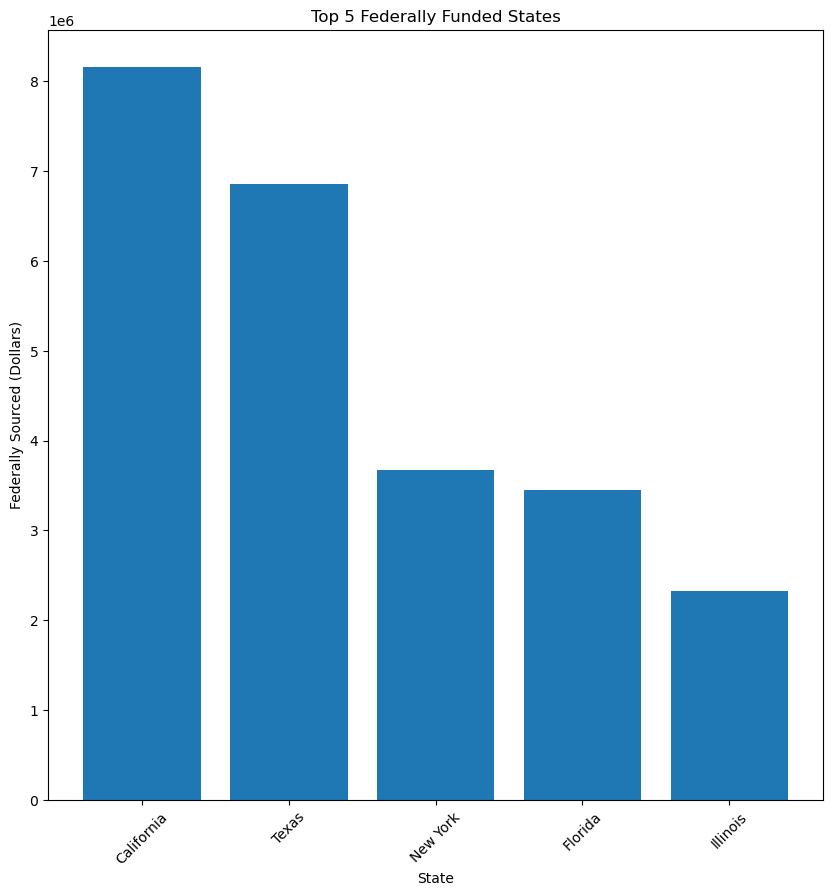

In [14]:
# CREATE A BAR GRAPH WITH THE TOP 5 FEDERALLY FUNDED SCHOOLS:

# Drop off the top 3 rows (United States), to include only the states:
full_data = full_data.drop(full_data.index[:3])

# Drop duplicate states:
full_data = full_data.drop_duplicates(subset=["State"])

# Filter sources from "full_data", in DESCENDING order:
full_data_top_5 = full_data.sort_values(by="From federal sources", ascending=False).head(5)

# Extract the states and "From federal sources" corresponding to the top five entries:
top_5_fed_fund_state = full_data_top_5["State"]
top_5_fed_fund_fed_source = full_data_top_5["From federal sources"]

# Creation of the bar plot:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.bar(top_5_fed_fund_state, top_5_fed_fund_fed_source)
plt.xlabel("State")
plt.ylabel("Federally Sourced (Dollars)")
plt.title("Top 5 Federally Funded States")
plt.show()

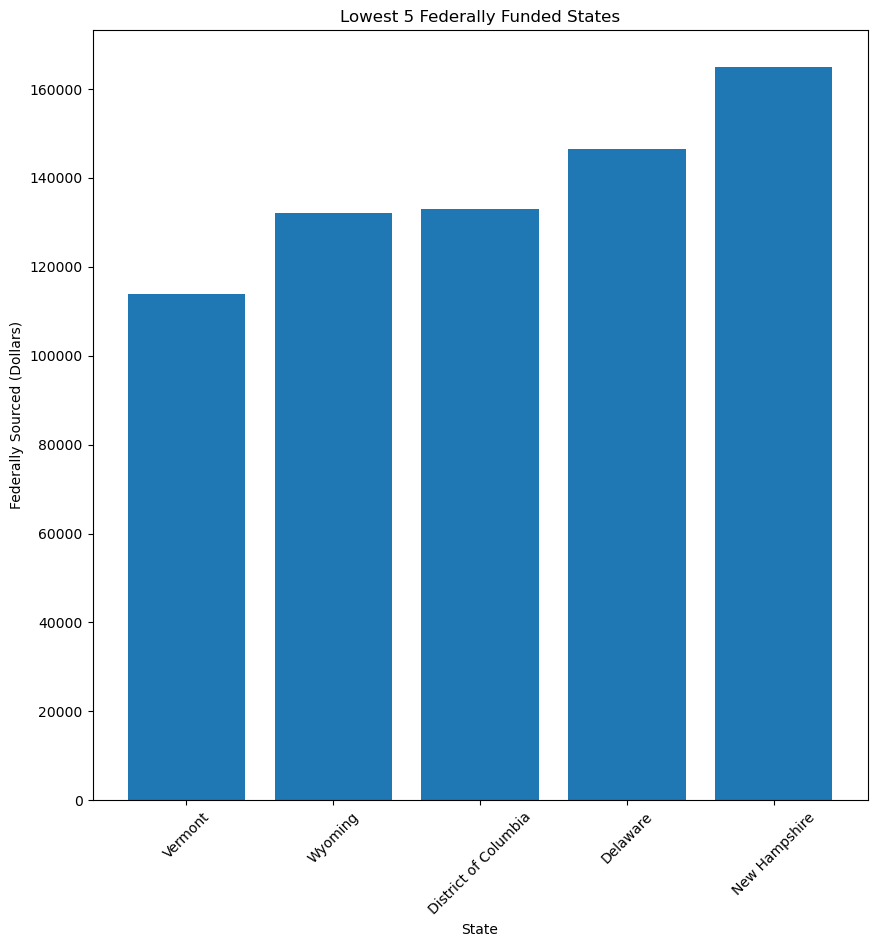

In [15]:
# CREATE A BAR GRAPH WITH THE Lowest 5 FEDERALLY FUNDED SCHOOLS:

# Drop off the top 3 rows (United States), to include only the states:
full_data = full_data.drop(full_data.index[:3])

# Drop duplicate states:
full_data = full_data.drop_duplicates(subset=["State"])

# Filter sources from "full_data", in ASCENDING order :
full_data_low_5 = full_data.sort_values(by="From federal sources", ascending=True).head(5)

# Extract the states and "From federal sources" corresponding to the top five entries:
low_5_fed_fund_state = full_data_low_5["State"]
low_5_fed_fund_fed_source = full_data_low_5["From federal sources"]

# Creation of the bar plot:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.bar(low_5_fed_fund_state, low_5_fed_fund_fed_source)
plt.xlabel("State")
plt.ylabel("Federally Sourced (Dollars)")
plt.title("Lowest 5 Federally Funded States")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

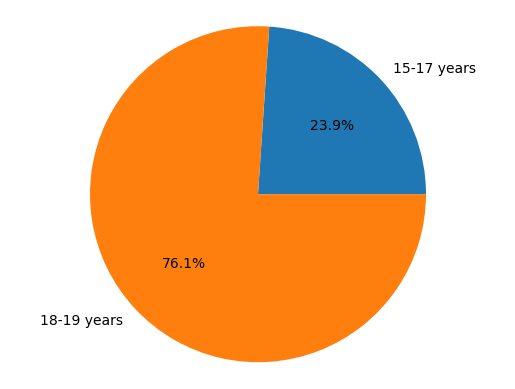

In [16]:
#Split of 15-17 yearl old pregnacies and 18-19 yearld old pregnacies
age = ["15-17 years", "18-19 years"]

#numbers gotten from the full data set looking at births for the 
#total us in the respective ages
numbers = [41081, 130593]

plt.pie(numbers, labels = age, autopct = "%1.1f%%")
plt.axis("equal")
plt.show